In [1]:
import numpy as np
import pandas as pd
import string
import sys
import os
from os import listdir
import unicodedata

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
from os import listdir
from os.path import isfile, join
files = [f for f in listdir('data/') if isfile(join('data/', f))]

In [5]:
dirs = [f for f in listdir('data/') if f != '.DS_Store']

In [6]:
dirs

['Engineering_Village_abstract_5-30-2020_182221741.csv',
 'Engineering_Village_abstract_5-30-2020_183128807.csv',
 'Engineering_Village_abstract_5-30-2020_181849391.csv',
 'Engineering_Village_abstract_5-30-2020_181924341.csv',
 'Engineering_Village_abstract_5-30-2020_182257830.csv',
 'Engineering_Village_abstract_5-30-2020_191525912.csv',
 'Engineering_Village_abstract_5-30-2020_18281597.csv',
 'Engineering_Village_abstract_5-30-2020_184340343.csv',
 'Engineering_Village_abstract_5-30-2020_191633980.csv',
 'Engineering_Village_abstract_5-30-2020_184044448.csv',
 'Engineering_Village_abstract_5-30-2020_184234707.csv',
 'Engineering_Village_abstract_5-30-2020_181129657.csv',
 'Engineering_Village_abstract_5-30-2020_183915580.csv',
 'Engineering_Village_abstract_5-30-2020_191357341.csv',
 'Engineering_Village_abstract_5-30-2020_18181768.csv',
 'Engineering_Village_abstract_5-30-2020_181956151.csv',
 'Engineering_Village_abstract_5-30-2020_19196565.csv',
 'Engineering_Village_abstract_5-3

In [19]:
frames = [ pd.read_csv('data/{}'.format(f),error_bad_lines=False) for f in files ]
df = pd.concat(frames)

b'Skipping line 6: expected 27 fields, saw 34\nSkipping line 14: expected 27 fields, saw 28\nSkipping line 24: expected 27 fields, saw 28\nSkipping line 39: expected 27 fields, saw 31\nSkipping line 49: expected 27 fields, saw 31\nSkipping line 61: expected 27 fields, saw 32\nSkipping line 64: expected 27 fields, saw 29\nSkipping line 66: expected 27 fields, saw 31\nSkipping line 69: expected 27 fields, saw 28\nSkipping line 73: expected 27 fields, saw 31\nSkipping line 74: expected 27 fields, saw 31\nSkipping line 76: expected 27 fields, saw 52\nSkipping line 97: expected 27 fields, saw 28\nSkipping line 101: expected 27 fields, saw 28\nSkipping line 149: expected 27 fields, saw 29\nSkipping line 153: expected 27 fields, saw 28\nSkipping line 154: expected 27 fields, saw 30\nSkipping line 158: expected 27 fields, saw 30\nSkipping line 175: expected 27 fields, saw 30\nSkipping line 189: expected 27 fields, saw 31\nSkipping line 193: expected 27 fields, saw 32\nSkipping line 196: expect

b'Skipping line 25: expected 25 fields, saw 26\nSkipping line 27: expected 25 fields, saw 38\nSkipping line 67: expected 25 fields, saw 26\nSkipping line 83: expected 25 fields, saw 36\nSkipping line 113: expected 25 fields, saw 27\nSkipping line 118: expected 25 fields, saw 28\nSkipping line 122: expected 25 fields, saw 27\nSkipping line 176: expected 25 fields, saw 27\nSkipping line 183: expected 25 fields, saw 28\nSkipping line 186: expected 25 fields, saw 26\nSkipping line 199: expected 25 fields, saw 27\n'
b'Skipping line 12: expected 27 fields, saw 29\nSkipping line 36: expected 27 fields, saw 28\nSkipping line 39: expected 27 fields, saw 28\nSkipping line 49: expected 27 fields, saw 33\nSkipping line 52: expected 27 fields, saw 32\nSkipping line 57: expected 27 fields, saw 30\nSkipping line 61: expected 27 fields, saw 33\nSkipping line 87: expected 27 fields, saw 30\nSkipping line 88: expected 27 fields, saw 37\nSkipping line 121: expected 27 fields, saw 28\nSkipping line 122: e

In [23]:
df.head()

,Title,Author,Author affiliation,Source,Publisher,Volume and Issue,Pages,Issue date,Monograph title,Publication year,...,Uncontrolled terms,Classification code,Treatment,Funding details,Funding text,Access type,Database,Copyright,Data Provider,Unnamed: 0
0,Guest editorial: Structural seismic safety ass...,"Oliveira, Carlos Sousa (1); Costa, Aníbal (2);...","(1) Instituto Superior Tecnico, Lisbon, Portug...",Bulletin of Earthquake Engineering,Springer Netherlands,"v 8, n 1",p 1-3,February 2010,NaN,2010.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Compendex,"Compilation and indexing terms, Copyright 2020...",Engineering Village,NaN
1,Current empirical ground-motion prediction equ...,"Bommer, Julian J. (1); Stafford, Peter J. (1);...",(1) Department of Civil and Environmental Engi...,Bulletin of Earthquake Engineering,Springer Netherlands,"v 8, n 1",p 5-26,February 2010,NaN,2010.0,...,Attenuation - Eurocode 8 - Europe - Ground mot...,408 Structural Design - 484 Seismology - 902.2...,NaN,NaN,NaN,NaN,Compendex,"Compilation and indexing terms, Copyright 2020...",Engineering Village,NaN
2,Engineering ground motion record selection in ...,"Iervolino, Iunio (1); Galasso, Carmine (1); Pa...","(1) Dipartimento di Ingegneria Strutturale, Un...",Bulletin of Earthquake Engineering,Kluwer Academic Publishers,"v 9, n 6",p 1761-1778,December 2011,NaN,2011.0,...,Automatic selection - Horizontal ground motion...,402 Buildings and Towers - 484 Seismology,NaN,NaN,NaN,NaN,Compendex,"Compilation and indexing terms, Copyright 2020...",Engineering Village,NaN
3,Seismic vulnerability assessment and character...,"Neves, Filipe (1, 3); Costa, Aníbal (1); Vicen...","(1) Department of Civil Engineering, Universit...",Bulletin of Earthquake Engineering,Kluwer Academic Publishers,"v 10, n 1",p 27-44,February 2012,NaN,2012.0,...,"Damage classification - Faial Island , Azores ...",402 Buildings and Towers - 412 Concrete - 484 ...,NaN,NaN,NaN,NaN,Compendex,"Compilation and indexing terms, Copyright 2020...",Engineering Village,NaN
4,A fast method for structural health monitoring...,"Ponzo, F.C. (1); Ditommaso, R. (1); Auletta, G...","(1) Department of Structures, Geotechnics, Eng...",Bulletin of Earthquake Engineering,Kluwer Academic Publishers,"v 8, n 6",p 1421-1434,December 2010,NaN,2010.0,...,Damage assessments - Damage evaluation - Dynam...,412 Concrete - 422 Strength of Building Materi...,NaN,NaN,Acknowledgements This study was developed with...,NaN,Compendex,"Compilation and indexing terms, Copyright 2020...",Engineering Village,NaN


In [18]:
for f in dirs:
    
    df = pd.read_csv('data/{}'.format(f),error_bad_lines=False)
    df = df[['Title','Author','Abstract']]
    print (df.columns.values)

b'Skipping line 6: expected 27 fields, saw 34\nSkipping line 14: expected 27 fields, saw 28\nSkipping line 24: expected 27 fields, saw 28\nSkipping line 39: expected 27 fields, saw 31\nSkipping line 49: expected 27 fields, saw 31\nSkipping line 61: expected 27 fields, saw 32\nSkipping line 64: expected 27 fields, saw 29\nSkipping line 66: expected 27 fields, saw 31\nSkipping line 69: expected 27 fields, saw 28\nSkipping line 73: expected 27 fields, saw 31\nSkipping line 74: expected 27 fields, saw 31\nSkipping line 76: expected 27 fields, saw 52\nSkipping line 97: expected 27 fields, saw 28\nSkipping line 101: expected 27 fields, saw 28\nSkipping line 149: expected 27 fields, saw 29\nSkipping line 153: expected 27 fields, saw 28\nSkipping line 154: expected 27 fields, saw 30\nSkipping line 158: expected 27 fields, saw 30\nSkipping line 175: expected 27 fields, saw 30\nSkipping line 189: expected 27 fields, saw 31\nSkipping line 193: expected 27 fields, saw 32\nSkipping line 196: expect

['Title' 'Author' 'Abstract']
['Title' 'Author' 'Abstract']
['Title' 'Author' 'Abstract']
['Title' 'Author' 'Abstract']
['Title' 'Author' 'Abstract']
['Title' 'Author' 'Abstract']
['Title' 'Author' 'Abstract']
['Title' 'Author' 'Abstract']
['Title' 'Author' 'Abstract']


b'Skipping line 82: expected 23 fields, saw 24\nSkipping line 155: expected 23 fields, saw 25\n'
b'Skipping line 25: expected 23 fields, saw 24\nSkipping line 45: expected 23 fields, saw 26\nSkipping line 53: expected 23 fields, saw 24\nSkipping line 58: expected 23 fields, saw 27\nSkipping line 91: expected 23 fields, saw 24\nSkipping line 127: expected 23 fields, saw 25\nSkipping line 188: expected 23 fields, saw 25\nSkipping line 190: expected 23 fields, saw 27\nSkipping line 193: expected 23 fields, saw 25\nSkipping line 384: expected 23 fields, saw 24\nSkipping line 397: expected 23 fields, saw 26\nSkipping line 545: expected 23 fields, saw 24\nSkipping line 550: expected 23 fields, saw 24\nSkipping line 563: expected 23 fields, saw 24\nSkipping line 612: expected 23 fields, saw 26\nSkipping line 616: expected 23 fields, saw 25\nSkipping line 619: expected 23 fields, saw 28\nSkipping line 640: expected 23 fields, saw 29\nSkipping line 644: expected 23 fields, saw 26\nSkipping line

['Title' 'Author' 'Abstract']
['Title' 'Author' 'Abstract']
['Title' 'Author' 'Abstract']
['Title' 'Author' 'Abstract']
['Title' 'Author' 'Abstract']
['Title' 'Author' 'Abstract']
['Title' 'Author' 'Abstract']
['Title' 'Author' 'Abstract']
['Title' 'Author' 'Abstract']
['Title' 'Author' 'Abstract']


b'Skipping line 49: expected 27 fields, saw 29\nSkipping line 53: expected 27 fields, saw 28\nSkipping line 54: expected 27 fields, saw 30\nSkipping line 58: expected 27 fields, saw 30\nSkipping line 75: expected 27 fields, saw 30\nSkipping line 89: expected 27 fields, saw 31\nSkipping line 93: expected 27 fields, saw 32\nSkipping line 96: expected 27 fields, saw 29\nSkipping line 112: expected 27 fields, saw 29\nSkipping line 136: expected 27 fields, saw 28\nSkipping line 139: expected 27 fields, saw 28\nSkipping line 149: expected 27 fields, saw 33\nSkipping line 152: expected 27 fields, saw 32\nSkipping line 157: expected 27 fields, saw 30\nSkipping line 161: expected 27 fields, saw 33\nSkipping line 187: expected 27 fields, saw 30\nSkipping line 188: expected 27 fields, saw 37\nSkipping line 221: expected 27 fields, saw 28\nSkipping line 222: expected 27 fields, saw 28\nSkipping line 228: expected 27 fields, saw 31\nSkipping line 249: expected 27 fields, saw 29\nSkipping line 285: 

In [8]:
df = pd.read_csv('data/Engineering_Village_abstract_5-30-2020_183128807.csv',error_bad_lines=False)

b'Skipping line 6: expected 24 fields, saw 29\nSkipping line 11: expected 24 fields, saw 25\nSkipping line 36: expected 24 fields, saw 25\nSkipping line 48: expected 24 fields, saw 28\nSkipping line 49: expected 24 fields, saw 26\nSkipping line 56: expected 24 fields, saw 28\nSkipping line 135: expected 24 fields, saw 25\nSkipping line 155: expected 24 fields, saw 25\nSkipping line 171: expected 24 fields, saw 27\nSkipping line 185: expected 24 fields, saw 25\nSkipping line 196: expected 24 fields, saw 27\nSkipping line 207: expected 24 fields, saw 26\nSkipping line 223: expected 24 fields, saw 27\nSkipping line 235: expected 24 fields, saw 25\nSkipping line 283: expected 24 fields, saw 26\nSkipping line 287: expected 24 fields, saw 26\nSkipping line 547: expected 24 fields, saw 26\nSkipping line 575: expected 24 fields, saw 25\nSkipping line 642: expected 24 fields, saw 26\n'


In [29]:
pd.set_option('display.max_columns', None)
df.head()

,Title,Author,Author affiliation,Source,Publisher,Volume and Issue,Pages,Issue date,Monograph title,Publication year,ISSN,DOI,Abstract,Number of references,Main Heading,Controlled/Subject terms,Uncontrolled terms,Classification code,Funding details,Funding text,Access type,Database,Copyright,Data Provider
0,Preliminary definition of fragility curves for...,"Thomopoulos, C. (1); Lai, C.G. (2)","(1) ROSE School, IUSS Pavia, Pavia, Italy (2) ...",Journal of Earthquake Engineering,Taylor and Francis Ltd.,"v 16, n SUPPL. 1",p 83-106,"January 1, 2012",NaN,2012,13632469,10.1080/13632469.2012.675839,Significant damage has been caused by past ear...,34.0,Piles,Earthquakes - Hydraulic structures - Nonlinear...,Fragility curves - Performance-based assessmen...,408.2 Structural Members and Shapes - 483.1 So...,"Number: -, Acronym: -, Sponsor: John S. Latsis...",The first author gratefully acknowledges the s...,NaN,Compendex,"Compilation and indexing terms, Copyright 2020...",Engineering Village
1,Guest editorial,"Dazio, Alessandro (1)","(1) UME School, Pavia, Italy",Journal of Earthquake Engineering,Taylor and Francis Ltd.,"v 16, n SUPPL. 1",p vii-viii,"January 1, 2012",NaN,2012,13632469,10.1080/13632469.2012.684293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Compendex,"Compilation and indexing terms, Copyright 2020...",Engineering Village
2,Ductility of a structural wall with spread reb...,"Preti, Marco (1); Giuriani, Ezio (1)","(1) Department of Civil, Architectural Environ...",Journal of Earthquake Engineering,Taylor and Francis Ltd.,"v 15, n 8",p 1238-1259,"December 1, 2011",NaN,2011,13632469,10.1080/13632469.2011.557139,The experimental work focuses on the ductility...,36.0,Reinforced concrete,Ductility - Earthquake engineering - Walls (st...,Earthquake resistant structures - Experimental...,408.2 Structural Members and Shapes - 412 Conc...,"Number: -, Acronym: MIUR, Sponsor: Ministero d...",The experimental test was partly financed by M...,NaN,Compendex,"Compilation and indexing terms, Copyright 2020...",Engineering Village
3,Effectiveness of rectangular spiral shear rein...,"Kakaletsis, D.J. (1); Karayannis, C.G. (2); Pa...","(1) Department of Civil Engineering, Technolog...",Journal of Earthquake Engineering,Taylor and Francis Ltd.,"v 15, n 8",p 1178-1193,"December 1, 2011",NaN,2011,13632469,10.1080/13632469.2011.560361,The effect of two types of shear reinforcement...,12.0,Shear flow,Compressive strength - Experiments - Reinforce...,Horizontal loading - Masonry Strength - R/c fr...,"412 Concrete - 631.1 Fluid Flow, General - 901...","Number: SAT/CE/59/15/1-/2-2010/6, Acronym: -, ...",The authors would like to thank the Research C...,NaN,Compendex,"Compilation and indexing terms, Copyright 2020...",Engineering Village
4,Can simple pulses adequately represent near-fa...,"Rupakhety, Rajesh (1); Sigbjörnsson, Ragnar (1...","(1) Earthquake Engineering Research Center, Un...",Journal of Earthquake Engineering,Taylor and Francis Ltd.,"v 15, n 8",p 1260-1272,"December 1, 2011",NaN,2011,13632469,10.1080/13632469.2011.565863,This article investigates the importance of hi...,27.0,Tall buildings,Engineering geology - Geotechnical engineering,Equivalent Pulse - Forward directivity - Inter...,402 Buildings and Towers - 409 Civil Engineeri...,"Number: -, Acronym: HI, Sponsor: H&Atilde;&iex...",The first author acknowledges a grant from the...,NaN,Compendex,"Compilation and indexing terms, Copyright 2020...",Engineering Village


In [33]:
abs_df = df['Abstract'].dropna()

In [34]:
abs_df
#655 non-null abstract vs 665 total

0      Significant damage has been caused by past ear...
2      The experimental work focuses on the ductility...
3      The effect of two types of shear reinforcement...
4      This article investigates the importance of hi...
5      Discrete time series representations for some ...
                             ...                        
660    Analytical investigations were carried out on ...
661    A recently developed Shape Memory Alloy (SMA) ...
662    This paper describes a generalized distributed...
663    In modular construction, individual modules ar...
664    The aim of this research is to contribute to i...
Name: Abstract, Length: 655, dtype: object

In [ ]:
def remove_accents(input_str):
    """
    remove accents for an input_str
    return str
    """
    nfkd_form = unicodedata.normalize('NFKD', input_str)
    only_ascii = nfkd_form.encode('ASCII', 'ignore')
    return only_ascii.decode()

In [37]:
def cleanText(wordSeries):
    tbl = dict.fromkeys(i for i in range(sys.maxunicode)
                        if unicodedata.category(chr(i)).startswith('P'))

    def remove_accents(input_str):
        nfkd_form = unicodedata.normalize('NFKD', input_str)
        only_ascii = nfkd_form.encode('ASCII', 'ignore')
        return only_ascii.decode()

    def remove_punctuation(text):
        return text.translate(tbl)

    # remove punctuation
    wordSeries = wordSeries.apply(lambda x: remove_punctuation(x))
    wordSeries = wordSeries.apply(lambda x: ''.join([i for i in x if not i.isdigit()]))  #remove digits
    wordSeries = wordSeries.apply(lambda x: x.lower())#lower cases
    wordSeries = wordSeries.apply(lambda x: x.replace('<br >', ' '))#remove html
    wordSeries = wordSeries.apply(lambda x: x.replace('<br>', ' '))#remove html
    wordSeries = wordSeries.apply(lambda x: x.replace('\n', ' '))#remove html
    wordSeries = wordSeries.apply(lambda x: x.replace('\n\n', ' '))
    wordSeries = wordSeries.apply(lambda x: x.replace('$', ' '))
    wordSeries = wordSeries.apply(lambda x: x.replace('>', ' '))
    wordSeries = wordSeries.apply(lambda x: remove_accents(x))
    wordSeries = wordSeries.apply(lambda x: x.replace('`', ''))#remove extra punctuation
    # wordSeries = wordSeries.apply(lambda x: x.replace(' id ', ' '))
    return wordSeries

In [39]:
abs_clean = cleanText(abs_df)

In [45]:
def tokenize(documents, stopwords):
    """
    Input: Array of documents

    Remove stopwords, html, punctuation, digits
    Tokenize each document
    Lemmatize tokens for each document

    Return: Array of tokenized documents
    """
    documents = cleanText(documents)
    docs = [word_tokenize(content) for content in documents] #tokenize row by row
    stopwords_=set(stopwords.words('english'))
    punctuation_ = set(string.punctuation)
    def filter_tokens(sent):
        return([w for w in sent if not w in stopwords_ and not w in punctuation_]) #remove stopword
    docs = list(map(filter_tokens,docs))
    lemmatizer = WordNetLemmatizer()
    docs_lemma = [[lemmatizer.lemmatize(word) for word in words] for words in docs]
    return docs_lemma

In [46]:
tokens = tokenize(abs_clean,stopwords)

In [51]:
import operator
def wordCounter(tokens):
    """Take array of tokenized documents
    Get sorted word counts dict
    """
    words = {}
    for row in tokens:
        for word in row:
            if word in words:
                words[word] += 1
            else:
                words[word] = 1

    sorted_d = dict(sorted(words.items(),
                           key=operator.itemgetter(1),
                           reverse=True))
    return sorted_d

In [56]:
count = wordCounter(tokens)
count 

{'seismic': 790,
 'response': 534,
 'model': 519,
 'result': 454,
 'analysis': 432,
 'building': 420,
 'earthquake': 419,
 'structure': 406,
 'motion': 385,
 'method': 381,
 'system': 363,
 'ground': 355,
 'proposed': 349,
 'group': 340,
 'study': 340,
 'taylor': 333,
 'francis': 333,
 'design': 331,
 'using': 329,
 'copyright': 319,
 'llc': 317,
 'damage': 302,
 'elnashai': 297,
 'n': 279,
 'article': 272,
 'different': 263,
 'performance': 250,
 'effect': 248,
 'frame': 248,
 'structural': 243,
 'wall': 242,
 'displacement': 238,
 'used': 232,
 'test': 232,
 'dynamic': 227,
 'behavior': 227,
 'nonlinear': 224,
 'based': 215,
 'bridge': 208,
 'two': 200,
 'concrete': 196,
 'experimental': 184,
 'parameter': 177,
 'also': 170,
 'shear': 168,
 'ambraseys': 167,
 'level': 160,
 'numerical': 159,
 'approach': 156,
 'rc': 152,
 'presented': 152,
 'developed': 150,
 'procedure': 148,
 'soil': 146,
 'reinforced': 146,
 'spectrum': 146,
 'acceleration': 145,
 'time': 144,
 'ratio': 139,
 'sit

In [61]:
bow = count.keys()

In [59]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image

In [60]:
def plotWordCloud(ax, bow, title='Word Cloud'):
    # ax.figure(figsize=(20, 10))
    wc = WordCloud(background_color="white",
                   width=1000,
                   height=1000,
                   max_words=100,
                   relative_scaling=0.5,
                   normalize_plurals=False).generate_from_frequencies(bow)
    ax.grid(False)
    ax.set_title(title, size=36)
    ax.axis('off')
    ax.imshow(wc)

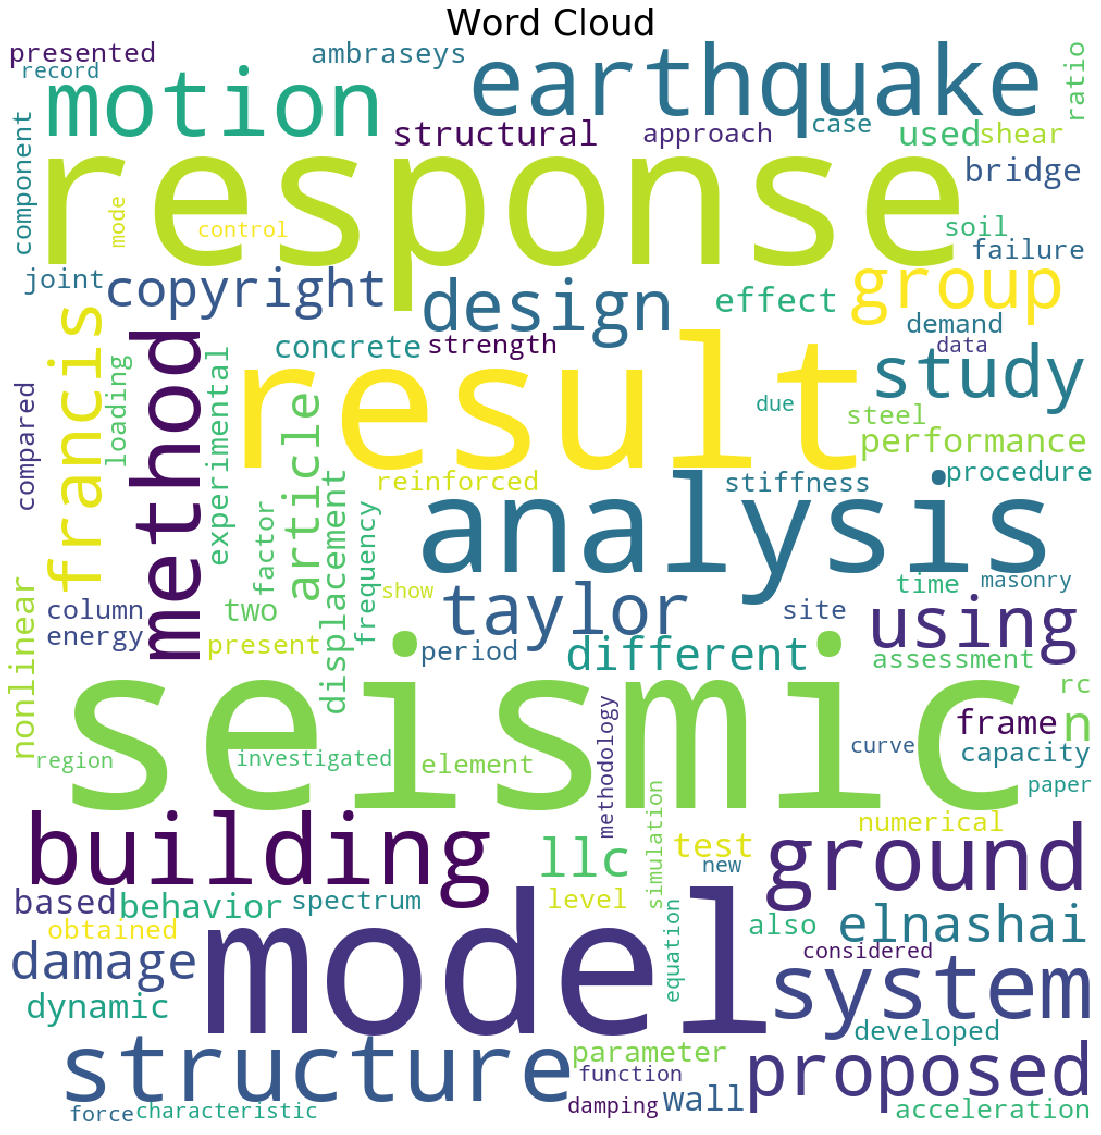

In [66]:
fig, ax = plt.subplots(figsize = (20,20))
plotWordCloud(ax,count)
plt.savefig('wordcloud.png')